In [1]:
basedir = '/home/abhinavgupta0110/NeuralODEs_ROM_Closure'

import os

is_google_colab = False

### Mount the Google drive if needed

In [2]:
if is_google_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    
    %pip install quadpy

os.chdir(os.path.join(basedir, 'neuralClosureModels'))

In [3]:
from src.solvers.neuralDDE_with_adjoint_accel import history

import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

In [4]:
os.chdir(basedir)

In [5]:
class args:
    def __init__(self, model_dir):
        self.model_dir = model_dir

In [6]:
# class read_data:

#     def __init__(self, last = 20):
#         self.last = last

#     def read(self, model_dir):

#         data = []
        
#         for i in range(len(model_dir)):
#             data.append([])
#             for j in range(len(model_dir[i])):
                
#                 loss_history = history(args(model_dir[i][j]))
#                 loss_history.read()
                
#                 data_to_add = np.mean(loss_history.val_loss[-1:-self.last:-1])
                
#                 if data_to_add >= 0.3: 
#                     pass
#                 else:
#                     data[i].append(data_to_add)
                
#         return data
                            

In [7]:
class read_data:

    def __init__(self, last = 20):
        self.last = last

    def read(self, model_dir):

        data = []
        
        for i in range(len(model_dir)):
            data.append([])
            for j in range(len(model_dir[i])):
                
                loss_history = history(args(model_dir[i][j]))
                loss_history.read()
                
                for k in range(self.last):
                    data_to_add = loss_history.val_loss[-1 - k]

                    if data_to_add >= 0.3: 
                        pass
                    else:
                        data[i].append(data_to_add)
                
        return data

In [8]:
model_dirs = []

model_dirs.append(['Res_nODE_testcase_v2/model_dir_case1', 'Res_nODE_testcase_v2/model_dir_case1b', 
                 'Res_nODE_testcase_v2/model_dir_case1c', 'Res_nODE_testcase_v2/model_dir_case1d', 
                   'Res_nODE_testcase_v2/model_dir_case1e', 'Res_nODE_testcase_v2/model_dir_case1f',
                  'Res_nODE_testcase_v2/model_dir_case1g', 'Res_nODE_testcase_v2/model_dir_case1h'])

model_dirs.append(['Res_nDistDDE_testcase_v3/model_dir_case3', 'Res_nDistDDE_testcase_v3/model_dir_case3b', 
                 'Res_nDistDDE_testcase_v3/model_dir_case3c', 'Res_nDistDDE_testcase_v3/model_dir_case3d', 
                 'Res_nDistDDE_testcase_v3/model_dir_case3e', 'Res_nDistDDE_testcase_v3/model_dir_case3f', 
                  'Res_nDistDDE_testcase_v3/model_dir_case3g', 'Res_nDistDDE_testcase_v3/model_dir_case3h',
                  'Res_nDistDDE_testcase_v3/model_dir_case3i', 'Res_nDistDDE_testcase_v3/model_dir_case3j',
                  'Res_nDistDDE_testcase_v3/model_dir_case3k', 'Res_nDistDDE_testcase_v3/model_dir_case3l',
                  'Res_nDistDDE_testcase_v3/model_dir_case3m'])

model_dirs.append(['Res_nDistDDE_testcase_v3/model_dir_case4', 'Res_nDistDDE_testcase_v3/model_dir_case4b', 
                 'Res_nDistDDE_testcase_v3/model_dir_case4c', 'Res_nDistDDE_testcase_v3/model_dir_case4d', 
                 'Res_nDistDDE_testcase_v3/model_dir_case4e', 'Res_nDistDDE_testcase_v3/model_dir_case4f',
                  'Res_nDistDDE_testcase_v3/model_dir_case4g', 'Res_nDistDDE_testcase_v3/model_dir_case4h',
                  'Res_nDistDDE_testcase_v3/model_dir_case4i', 'Res_nDistDDE_testcase_v3/model_dir_case4j',
                  'Res_nDistDDE_testcase_v3/model_dir_case4k', 'Res_nDistDDE_testcase_v3/model_dir_case4l',
                  'Res_nDistDDE_testcase_v3/model_dir_case4m'])

model_dirs.append(['Res_nDistDDE_testcase_v3/model_dir_case5',  
                 'Res_nDistDDE_testcase_v3/model_dir_case5c', 'Res_nDistDDE_testcase_v3/model_dir_case5d', 
                 'Res_nDistDDE_testcase_v3/model_dir_case5e', 'Res_nDistDDE_testcase_v3/model_dir_case5f', 
                   'Res_nDistDDE_testcase_v3/model_dir_case5g',
                  'Res_nDistDDE_testcase_v3/model_dir_case5i', 'Res_nDistDDE_testcase_v3/model_dir_case5j',
                  'Res_nDistDDE_testcase_v3/model_dir_case5k', 
                  'Res_nDistDDE_testcase_v3/model_dir_case5m', 'Res_nDistDDE_testcase_v3/model_dir_case5q',
                   'Res_nDistDDE_testcase_v3/model_dir_case5r', 'Res_nDistDDE_testcase_v3/model_dir_case5s'])

model_dirs.append(['Res_nDistDDE_testcase_v3/model_dir_case1', 'Res_nDistDDE_testcase_v3/model_dir_case1b', 
                 'Res_nDistDDE_testcase_v3/model_dir_case1c', 'Res_nDistDDE_testcase_v3/model_dir_case1d', 
                 'Res_nDistDDE_testcase_v3/model_dir_case1e', 'Res_nDistDDE_testcase_v3/model_dir_case1f', 
                   'Res_nDistDDE_testcase_v3/model_dir_case1g', 'Res_nDistDDE_testcase_v3/model_dir_case1h',
                  'Res_nDistDDE_testcase_v3/model_dir_case1i', 'Res_nDistDDE_testcase_v3/model_dir_case1j',
                  'Res_nDistDDE_testcase_v3/model_dir_case1k', 
                  'Res_nDistDDE_testcase_v3/model_dir_case1m', 'Res_nDistDDE_testcase_v3/model_dir_case1n',
                   'Res_nDistDDE_testcase_v3/model_dir_case1q', 'Res_nDistDDE_testcase_v3/model_dir_case1r'])

model_dirs.append(['Res_nDistDDE_testcase_v3/model_dir_case2', 'Res_nDistDDE_testcase_v3/model_dir_case2b', 
                 'Res_nDistDDE_testcase_v3/model_dir_case2c', 'Res_nDistDDE_testcase_v3/model_dir_case2d', 
                 'Res_nDistDDE_testcase_v3/model_dir_case2e', 'Res_nDistDDE_testcase_v3/model_dir_case2f', 
                   'Res_nDistDDE_testcase_v3/model_dir_case2g', 'Res_nDistDDE_testcase_v3/model_dir_case2h',
                  'Res_nDistDDE_testcase_v3/model_dir_case2i', 'Res_nDistDDE_testcase_v3/model_dir_case2j',
                  'Res_nDistDDE_testcase_v3/model_dir_case2k', 'Res_nDistDDE_testcase_v3/model_dir_case2l',
                   'Res_nDistDDE_testcase_v3/model_dir_case2m'])

times = [0.0, 0.025, 0.075, 0.125, 0.2, 0.3]

In [9]:
data = read_data(last=50).read(model_dirs)

/home/abhinavgupta0110/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


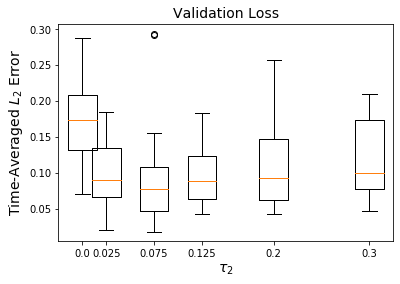

In [11]:
fig = plt.figure(figsize=(6, 4), facecolor='white')
ax = fig.add_subplot(111)

ax.cla()
ax.set_title('Validation Loss', fontsize=14)
ax.set_xlabel('$\\tau_2$', fontsize=14)
ax.set_ylabel('Time-Averaged $L_2$ Error', fontsize=14)

ax.boxplot(data, positions = times, widths=0.03)

ax.set_xlim(-0.025, 0.325)
# ax.set_ylim(0.0, 0.3)

plt.show() 